# Pakiety

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Boston Housing Dataset

In [2]:
np.random.seed(123)

boston_dict = load_boston()
print(boston_dict.keys())

boston=pd.DataFrame(boston_dict.data)
boston.columns=boston_dict.feature_names
print(boston.head())

X = boston
Y = pd.DataFrame(boston_dict.target)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [3]:
boston.info()
# nie ma braków, tylko dane numeryczne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Text(0, 0.5, 'RM')

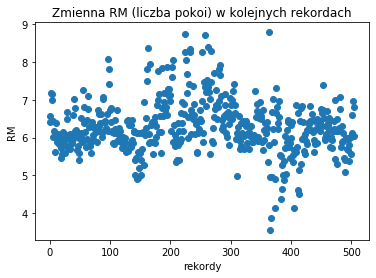

In [5]:
plt.plot(boston.RM, 'o')
plt.title('Zmienna RM (liczba pokoi) w kolejnych rekordach')
plt.xlabel('rekordy')
plt.ylabel('RM')

# pamiętamy o tytułach wykresu i osi
# co możemy wywnioskować?

Text(0.5, 1.0, 'Rozkład zmiennej RM')

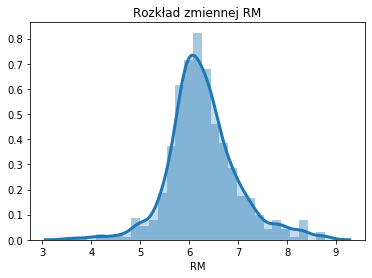

In [6]:
plot_dens=sns.distplot(boston.RM, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plot_dens.set_title('Rozkład zmiennej RM')

mediana = 6.2085
średnia = 6.284634387351787
Q1 = 5.8855 Q3 = 6.6235


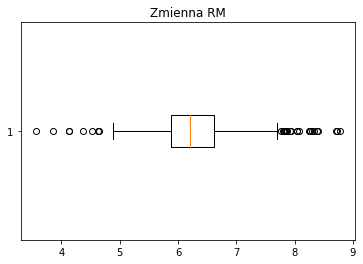

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title('Zmienna RM')
ax1.boxplot(boston.RM, vert=False)

print('mediana = %s' % np.median(boston.RM))
print('średnia = %s' % np.mean(boston.RM))
print('Q1 = %s' %np.percentile(boston.RM, 25),'Q3 = %s' %np.percentile(boston.RM, 75))
# może funkcja?

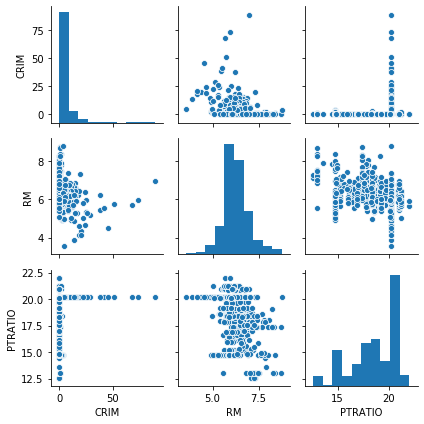

In [8]:
sns.pairplot(boston.iloc[:,[0,5,10]], size=2)
plt.tight_layout()
#CRIM - współczynnik przestępczości
#PTRATIO- stosunek liczby uczniów do liczby nauczycieli

# tak naprawdę wystarczyłoby narysowanie tylko części wykresów
# czy jest koleracja zmiennych?

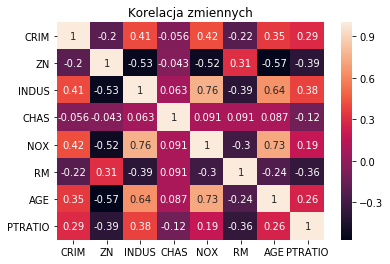

In [9]:
corr=boston.iloc[:,np.r_[0:7,10]].corr()
#plt.matshow(corr)
#plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
#plt.yticks(range(len(corr.columns)), corr.columns)
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)
# below is a workaround for matrix truncation
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych')
plt.show()

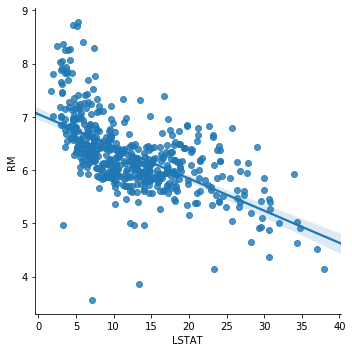

In [10]:
sns.lmplot(x='LSTAT', y='RM', data=boston)
#fit_reg=False, # No regression line
#dodaje automatycznie prostą regresji

In [11]:
#ekstrakcja informacji
criminal=boston[boston['CRIM']>50]
criminal

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62


# Zbiór danych nt. butów męskich

In [12]:
data = pd.read_csv('menshoes.csv')

data.head()
# zbiór wymagający czyszczenia

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,...,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN


In [13]:
data.info()
# dużo braków - kolumny gdzie są tylko braki usuwamy
#a co jeżeli wartości są w mniej niż 10% rekordów? - na następnych zajęciach to omówmimy
# są zmienne kategoryczne (object) i numeryczne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18280 entries, 0 to 18279
Data columns (total 48 columns):
id                     18280 non-null object
asins                  2161 non-null object
brand                  18263 non-null object
categories             18280 non-null object
colors                 10344 non-null object
count                  0 non-null float64
dateadded              18280 non-null object
dateupdated            18280 non-null object
descriptions           9704 non-null object
dimension              2968 non-null object
ean                    9690 non-null float64
features               13299 non-null object
flavors                0 non-null float64
imageurls              17255 non-null object
isbn                   0 non-null float64
keys                   18280 non-null object
manufacturer           6296 non-null object
manufacturernumber     14309 non-null object
merchants              13018 non-null object
name                   18280 non-null object
pric

In [14]:
data.brand.value_counts()  #taki zapis jest tożsamy z data['brand']
# w przyszłości należy zrobić normalizację

Nike                   1709
PUMA                    574
Ralph Lauren            524
New Balance             361
VANS                    356
                       ... 
NIKE AIR JORDAN           1
J`S AWAKE                 1
Diamondback Fitness       1
Cotton Plus               1
HUDSON                    1
Name: brand, Length: 1856, dtype: int64

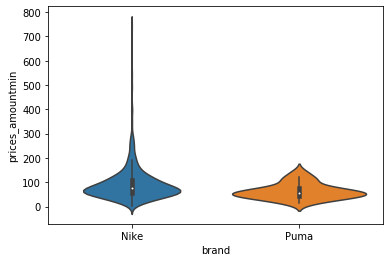

In [15]:
Nike_Puma=data[data.brand.isin(['Puma', 'Nike'])]
sns.violinplot(Nike_Puma.brand, Nike_Puma.prices_amountmin)

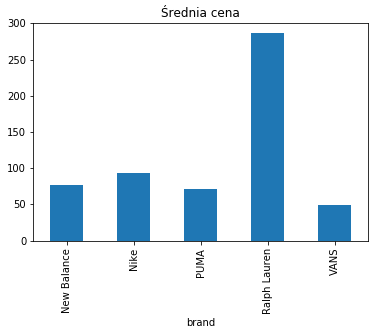

In [16]:
popular_brand=data[data.brand.isin(data.brand.value_counts().index[:5])]
mean_price_popular_brand=popular_brand.groupby('brand').prices_amountmin.mean()
mean_price_popular_brand.plot(kind='bar', title='Średnia cena')
#plt.bar(mean_price_popular_brand.index, mean_price_popular_brand)

In [17]:
# kiedy stosować pie chart?

Ciekawa strona z przykładami wizualizacji (wraz z kodem):
    https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

# Zadanie

Zadanie nie jest na ocenę, ma na celu tylko sprawdzenie jaki jest dominujący język/biblioteki w grupie i zobaczyć jak sobie radzicie z danymi

Pobierz zbiór danych ze strony:
https://www.mldata.io/dataset-details/abalone/
- Przeprowadź EDA dowolnej kolumny numerycznej w wybranym przez siebie języku i bibliotekach:
- Rozkład zmiennej
- Zależności między wybraną zmienną a innymi
- Krótki opis tego co wyszło

Rozwiązanie (Jupyter Notebook/Rmd + HTML) należy wrzucić jako pull request na repo https://github.com/mini-pw/2020L-WUM do folderu Laboratoria/Grupa1/NazwiskoImie/

Nawet jeżeli ktoś zrobi bardzo mało - proszę wrzucić cokolwiek - w taki sposób będzie sprawdzona obecność na zajęciach.

# Transformacje danych

Text(0.5, 1.0, 'rozkład ceny butów')

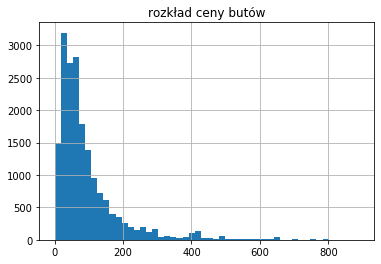

In [18]:
data['prices_amountmin'].hist(bins=50)
plt.title('rozkład ceny butów')
#widoczny jest długi ogon

In [19]:
np.percentile(data.prices_amountmin,99)

495.0

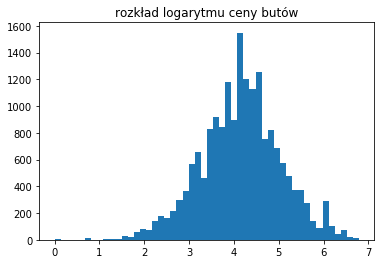

In [20]:
price_after_log=np.log1p(data.prices_amountmin)
plt.hist(price_after_log, bins=50)
plt.title('rozkład logarytmu ceny butów')
plt.show()

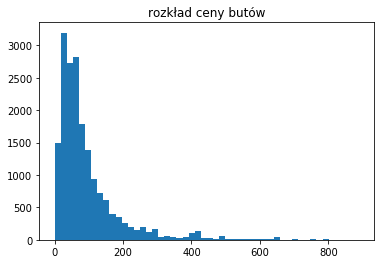

In [21]:
inv_transform=np.expm1(price_after_log)
plt.hist(inv_transform, bins=50)
plt.title('rozkład ceny butów')
plt.show()

In [22]:
# Normalizacja zmiennych kategorycznych

In [23]:
# Duża liczba zmiennych kategorycznych unikalnych

In [24]:
# Zamiana zmiennych kategorycznych na inne kodowanie

In [25]:
# Braki w danych

# Selekcja zmiennych

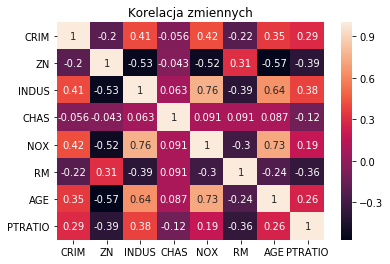

In [26]:
corr=boston.iloc[:,np.r_[0:7,10]].corr()
#plt.matshow(corr)
#plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
#plt.yticks(range(len(corr.columns)), corr.columns)
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)
# below is a workaround for matrix truncation
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych')
plt.show()

In [27]:
from scipy.stats import chi2_contingency
# H0: Zmienne są niezależne (odrzucamy gdy p_value<alfa)
for i in boston.columns:
    d=np.hstack([Y.values,boston[i].values.reshape(-1,1)])
    p_value=chi2_contingency(d)[1]
    if p_value<0.05:
        print('%s - ISTOTNA' %i)
    else:
        print ('%s - NIEISTOTNA' %i)

CRIM - ISTOTNA
ZN - ISTOTNA
INDUS - ISTOTNA
CHAS - NIEISTOTNA
NOX - NIEISTOTNA
RM - NIEISTOTNA
AGE - ISTOTNA
DIS - NIEISTOTNA
RAD - ISTOTNA
TAX - ISTOTNA
PTRATIO - ISTOTNA
B - ISTOTNA
LSTAT - ISTOTNA
